Atividade de Incerteza de modelos

1. Escolha um problema de classificação e treine um pool de modelos com algoritmos de diferentes famílias.

Objetivo: classificar se o usuárío vai ou não escolher um local para viajar usando o airbnb e identificar as incerteza do problema

https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/data

### pre processamento

In [1]:
import pandas as pd

In [2]:
df_users = pd.read_csv('train_users_2.csv')

In [3]:
df_countries = pd.read_csv('countries.csv')

In [4]:
df_countries.columns

Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')

In [5]:
df_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [6]:
df_users = df_users.merge(df_countries, on = 'country_destination', how = 'left')

NDF = No destination found

In [7]:
df_users['country_destination'].value_counts()

,count
country_destination,
NDF,124543
US,62376
other,10094
FR,5023
IT,2835
GB,2324
ES,2249
CA,1428
DE,1061


In [8]:
df_users['date_first_active'] = pd.to_datetime(df_users['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [9]:

# Criar uma coluna apenas com a data
df_users['date_month_year_first_active'] = df_users['date_first_active'].dt.date


In [10]:
df_users['date_first_active'].head()

,date_first_active
0,2009-03-19 04:32:55
1,2009-05-23 17:48:09
2,2009-06-09 23:12:47
3,2009-10-31 06:01:29
4,2009-12-08 06:11:05


In [11]:
df_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'lat_destination',
       'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance',
       'date_first_active', 'date_month_year_first_active'],
      dtype='object')

In [12]:
def is_first_booking(row):
    if pd.isna(row['date_first_booking']):
        return True
    else:
        return False

In [13]:
def destination_decided(row):
    if row['country_destination']=='NDF':
        return False
    else:
        return True

In [14]:
# Converter ambas as colunas de strings para o tipo datetime
df_users['date_first_booking'] = pd.to_datetime(df_users['date_first_booking'])
df_users['date_account_created'] = pd.to_datetime(df_users['date_account_created'])


In [15]:
df_users = df_users.drop(columns =['date_month_year_first_active'])

In [16]:
df_users['days_between'] = ( df_users['date_first_booking'] -  df_users['date_account_created']).dt.days


In [17]:
df_users['days_between'].head()

,days_between
0,NaN
1,NaN
2,-57.0
3,278.0
4,-208.0


Levando em consideração que 2015-06-28 foi o ultimo dia

In [18]:
df_users['date_first_booking'].isna()

,date_first_booking
0,True
1,True
2,False
3,False
4,False
...,...
213446,True
213447,True
213448,True
213449,True


In [19]:
fixed_date = pd.to_datetime('2015-06-29')

df_users['days_between'] = df_users['days_between'].fillna((fixed_date - df_users['date_account_created']).dt.days)


In [20]:
df_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,date_first_active,days_between
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,-unknown-,NaN,facebook,0,en,direct,...,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN,2009-03-19 04:32:55,1827.0
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,...,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-23 17:48:09,1496.0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,IE,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0,2009-06-09 23:12:47,-57.0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Firefox,other,NaN,NaN,NaN,NaN,NaN,NaN,2009-10-31 06:01:29,278.0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0,2009-12-08 06:11:05,-208.0


In [21]:
df_users['days_between'].head()

,days_between
0,1827.0
1,1496.0
2,-57.0
3,278.0
4,-208.0


Remover datas inconsistentes

In [22]:
df_users = df_users[df_users['days_between']>= 0]

In [23]:
len(df_users)

213422

In [24]:
df_users = df_users.drop(columns = ['timestamp_first_active'])

In [25]:
df_users['first_booking'] = df_users.apply(is_first_booking, axis=1)

In [26]:
df_users['decided_destination'] = df_users.apply(destination_decided, axis=1)

In [27]:
df_users['decided_destination'].value_counts()

,count
decided_destination,
False,124543
True,88879


In [28]:
df_users['first_booking'].value_counts()

,count
first_booking,
True,124543
False,88879


In [29]:
df_users.columns

Index(['id', 'date_account_created', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'lat_destination', 'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance',
       'date_first_active', 'days_between', 'first_booking',
       'decided_destination'],
      dtype='object')

In [30]:
df_users = df_users.drop(columns=['id','date_first_active', 'date_account_created', 'date_first_booking', 'country_destination','lat_destination', 'lng_destination','distance_km', 'destination_km2','destination_language ', 'language_levenshtein_distance', 'first_affiliate_tracked','signup_flow'])

In [31]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'signup_app', 'first_device_type',
       'first_browser', 'days_between', 'first_booking',
       'decided_destination'],
      dtype='object')

In [32]:
df_users = df_users[(df_users['age']<100) & (df_users['age']>18)]

In [33]:
df_users = df_users[df_users['gender']!='-unknown-']

In [34]:
df_users['first_browser'].value_counts()

,count
first_browser,
Chrome,35912
Safari,23685
Firefox,17429
-unknown-,10448
IE,8856
Mobile Safari,8797
Chrome Mobile,472
Android Browser,352
Opera,94


In [35]:
df_users = df_users.drop(columns = ['first_browser'])

In [36]:
df_users.head()

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,days_between,first_booking,decided_destination
1,MALE,38.0,facebook,en,seo,google,Web,Mac Desktop,1496.0,True,False
3,FEMALE,42.0,facebook,en,direct,direct,Web,Mac Desktop,278.0,False,True
6,FEMALE,46.0,basic,en,other,craigslist,Web,Mac Desktop,3.0,False,True
7,FEMALE,47.0,basic,en,direct,direct,Web,Mac Desktop,10.0,False,True
8,FEMALE,50.0,basic,en,other,craigslist,Web,Mac Desktop,206.0,False,True


In [37]:
df_users['language'].value_counts()

,count
language,
en,102381
zh,814
fr,718
es,574
ko,368
de,356
it,337
ru,253
pt,162


In [38]:
def classify_language(language_code):
    # Dicionário de mapeamento das linguagens para suas famílias linguísticas
    language_families = {
        'pt': 'Latin',
        'fr': 'Latin',
        'es': 'Latin',
        'it': 'Latin',
        'ca': 'Latin',
        'ro': 'Latin',

        'en': 'Anglo-Saxon (Germanic)',
        'de': 'Anglo-Saxon (Germanic)',
        'nl': 'Anglo-Saxon (Germanic)',
        'da': 'Anglo-Saxon (Germanic)',
        'no': 'Anglo-Saxon (Germanic)',
        'is': 'Anglo-Saxon (Germanic)',

        'ru': 'Slavic',
        'pl': 'Slavic',
        'cs': 'Slavic',
        'hr': 'Slavic',

        'zh': 'Asian',
        'ko': 'Asian',
        'ja': 'Asian',
        'th': 'Asian',
        'id': 'Asian',

        'tr': 'Turkic',
        'el': 'Hellenic',
        'fi': 'Finno-Ugric',
        'hu': 'Finno-Ugric',

        'other': 'Other'
    }

    # Retornar a família linguística baseada no código, ou 'Unknown' se não estiver no dicionário
    return language_families.get(language_code, 'Unknown')


In [39]:
df_users['language'].value_counts()

,count
language,
en,102381
zh,814
fr,718
es,574
ko,368
de,356
it,337
ru,253
pt,162


In [40]:

# Aplicar a função para classificar as linguagens em um DataFrame
df_users['language'] = df_users['language'].apply(classify_language)


In [41]:
df_users['language'].value_counts()

,count
language,
Anglo-Saxon (Germanic),102834
Latin,1795
Asian,1338
Slavic,308
Unknown,74
Turkic,40
Finno-Ugric,26
Hellenic,21


In [42]:
def classify_channel(channel):
    # Dicionário de mapeamento dos canais para suas categorias
    channel_categories = {
        'google': 'Search Engine',
        'bing': 'Search Engine',
        'yahoo': 'Search Engine',
        'naver': 'Search Engine',
        'yandex': 'Search Engine',
        'baidu': 'Search Engine',

        'facebook': 'Social Media',
        'facebook-open-graph': 'Social Media',
        'craigslist': 'Social Media',
        'meetup': 'Social Media',
        'wayn': 'Social Media',

        'direct': 'Direct Traffic',

        'email-marketing': 'Email Marketing',

        'other': 'Other',
        'padmapper': 'Other',
        'vast': 'Other',
        'gsp': 'Other'
    }

    # Retornar a categoria baseada no canal, ou 'Unknown' se não estiver no dicionário
    return channel_categories.get(channel, 'Unknown')



In [43]:
df_users['affiliate_provider'] = df_users['affiliate_provider'].apply(classify_channel)


In [44]:
df_users['affiliate_provider'].value_counts()

,count
affiliate_provider,
Direct Traffic,67618
Search Engine,26398
Other,8514
Social Media,3840
Email Marketing,66


In [45]:
phones_dict = {'Mac Desktop': 'Desktop',
               'Windows Desktop':'Desktop',
               'iPhone':'Smartphone',
               'iPad': 'Tablet',
               'Android Phone':'Smartphone',
               'Desktop (Other)': 'Desktop',
               'Android Tablet':'Tablet',
               'SmartPhone (Other)': 'Smartphone'
                }

In [46]:
brand_dict = {'Mac Desktop': 'Apple',
               'Windows Desktop':'Windows',
               'iPhone':'Apple',
               'iPad': 'Apple',
               'Android Phone':'Android',
               'Desktop (Other)': 'Other',
               'Android Tablet':'Android',
               'SmartPhone (Other)': 'Other',
               'Other/Unknown': 'Other'

                }

In [47]:
df_users['brand_device'] = df_users['first_device_type'].replace(brand_dict)

In [48]:
df_users['brand_device'].value_counts()

,count
brand_device,
Apple,65142
Windows,35579
Other,4145
Android,1570


In [49]:
df_users = df_users.drop(columns = ['signup_app'])

In [50]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'first_booking', 'decided_destination', 'brand_device'],
      dtype='object')

In [51]:
df_users['first_device_type'] = df_users['first_device_type'].replace(phones_dict)

In [52]:
df_users['first_device_type'].value_counts()

,count
first_device_type,
Desktop,85839
Smartphone,10097
Tablet,7026
Other/Unknown,3474


In [53]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106436 entries, 1 to 213446
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               106436 non-null  object 
 1   age                  106436 non-null  float64
 2   signup_method        106436 non-null  object 
 3   language             106436 non-null  object 
 4   affiliate_channel    106436 non-null  object 
 5   affiliate_provider   106436 non-null  object 
 6   first_device_type    106436 non-null  object 
 7   days_between         106436 non-null  float64
 8   first_booking        106436 non-null  bool   
 9   decided_destination  106436 non-null  bool   
 10  brand_device         106436 non-null  object 
dtypes: bool(2), float64(2), object(7)
memory usage: 8.3+ MB


one hot encoding
normalizar os dados

In [54]:
from sklearn.preprocessing import OneHotEncoder


In [55]:
print(len(df_users))

106436


In [56]:
df_users['days_between']

,days_between
1,1496.0
3,278.0
6,3.0
7,10.0
8,206.0
...,...
213440,364.0
213441,44.0
213443,13.0
213445,2.0


In [57]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'first_booking', 'decided_destination', 'brand_device'],
      dtype='object')

In [58]:
df_users.head()

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_device_type,days_between,first_booking,decided_destination,brand_device
1,MALE,38.0,facebook,Anglo-Saxon (Germanic),seo,Search Engine,Desktop,1496.0,True,False,Apple
3,FEMALE,42.0,facebook,Anglo-Saxon (Germanic),direct,Direct Traffic,Desktop,278.0,False,True,Apple
6,FEMALE,46.0,basic,Anglo-Saxon (Germanic),other,Social Media,Desktop,3.0,False,True,Apple
7,FEMALE,47.0,basic,Anglo-Saxon (Germanic),direct,Direct Traffic,Desktop,10.0,False,True,Apple
8,FEMALE,50.0,basic,Anglo-Saxon (Germanic),other,Social Media,Desktop,206.0,False,True,Apple


Vou dividir as faixas dos dias em: 0-250, 250-500, 750-1000, 1000-1500 e 1500+

In [59]:
def number_days(row):
    if row<250:
        return '0-250'
    else:
        if row<500:
          return '250-500'
        else:
          return '500+'


In [60]:
df_users['days_between'] = df_users['days_between'].apply(number_days)


In [61]:
df_users['days_between'] .value_counts()

,count
days_between,
0-250,51130
500+,37805
250-500,17501


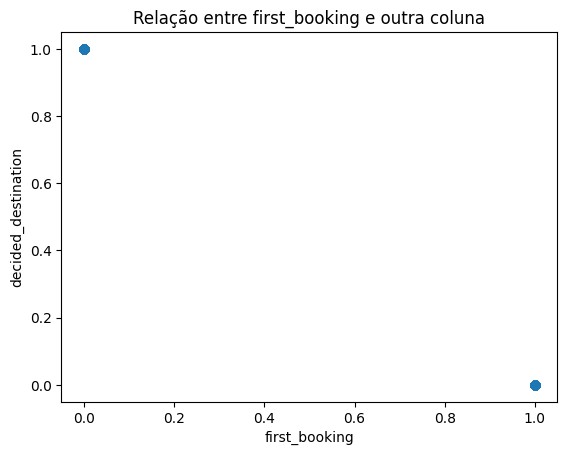

In [62]:
import matplotlib.pyplot as plt

# Gráfico de dispersão entre duas colunas
plt.scatter(df_users['first_booking'], df_users['decided_destination'])
plt.title('Relação entre first_booking e outra coluna')
plt.xlabel('first_booking')
plt.ylabel('decided_destination')
plt.show()

In [63]:
df_users = df_users.drop(columns = ['first_booking'])

In [64]:
df_users['age'].value_counts()

,count
age,
30.0,5377
31.0,5253
29.0,5231
28.0,5199
32.0,5086
...,...
94.0,12
91.0,11
88.0,11


In [65]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'decided_destination', 'brand_device'],
      dtype='object')

### Treating Cathegorical features


In [66]:
df_users.to_csv('users.csv')

In [67]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'decided_destination', 'brand_device'],
      dtype='object')

In [68]:
df_users.head()

,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_device_type,days_between,decided_destination,brand_device
1,MALE,38.0,facebook,Anglo-Saxon (Germanic),seo,Search Engine,Desktop,500+,False,Apple
3,FEMALE,42.0,facebook,Anglo-Saxon (Germanic),direct,Direct Traffic,Desktop,250-500,True,Apple
6,FEMALE,46.0,basic,Anglo-Saxon (Germanic),other,Social Media,Desktop,0-250,True,Apple
7,FEMALE,47.0,basic,Anglo-Saxon (Germanic),direct,Direct Traffic,Desktop,0-250,True,Apple
8,FEMALE,50.0,basic,Anglo-Saxon (Germanic),other,Social Media,Desktop,0-250,True,Apple


In [69]:
import pandas as pd

# Suponha que você tenha um DataFrame df_users
# df_users = pd.DataFrame({...})  # Seu DataFrame aqui

# Identificar apenas as colunas do tipo 'object'
object_cols = df_users.select_dtypes(include=['object']).columns
print("Colunas do tipo object:", object_cols)

# Codificar apenas as colunas de objeto
df_encoded = pd.get_dummies(df_users, columns=object_cols)

# Exibir as colunas do DataFrame codificado
print("Colunas do DataFrame codificado:", df_encoded.columns)

# O DataFrame df_encoded já contém as colunas que não são do tipo objeto
# Não é necessário selecionar novamente as colunas não objetivas

# Exibir o DataFrame final
print("Shape of final DataFrame:", df_encoded.shape)
print(df_encoded.head())  # Exibir as primeiras linhas do DataFrame final


Colunas do tipo object: Index(['gender', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'brand_device'],
      dtype='object')
Colunas do DataFrame codificado: Index(['age', 'decided_destination', 'gender_FEMALE', 'gender_MALE',
       'gender_OTHER', 'signup_method_basic', 'signup_method_facebook',
       'signup_method_google', 'language_Anglo-Saxon (Germanic)',
       'language_Asian', 'language_Finno-Ugric', 'language_Hellenic',
       'language_Latin', 'language_Slavic', 'language_Turkic',
       'language_Unknown', 'affiliate_channel_api',
       'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_remarketing',
       'affiliate_channel_sem-brand', 'affiliate_channel_sem-non-brand',
       'affiliate_channel_seo', 'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider

### modelos

In [70]:
X = df_encoded.drop(columns = ['decided_destination'])
y = df_encoded['decided_destination']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Suponha que y_train seja seu vetor de rótulos
# y_train = pd.Series([...])  # Seus dados aqui

# Verificando a distribuição original
print("Distribuição original:", Counter(y_train))

# Instanciando o SMOTE
smote = SMOTE(random_state=42)

# Realizando o oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificando a nova distribuição
print("Distribuição após SMOTE:", Counter(y_train_resampled))

# Agora você pode usar X_resampled e y_resampled para treinar seu modelo

Distribuição original: Counter({True: 44408, False: 40740})
Distribuição após SMOTE: Counter({True: 44408, False: 44408})


In [73]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Decision Tree

Decision Tree Results:
Accuracy: 0.9587091319052987
Confusion Matrix:
 [[10234     7]
 [  872 10175]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     10241
        True       1.00      0.92      0.96     11047

    accuracy                           0.96     21288
   macro avg       0.96      0.96      0.96     21288
weighted avg       0.96      0.96      0.96     21288



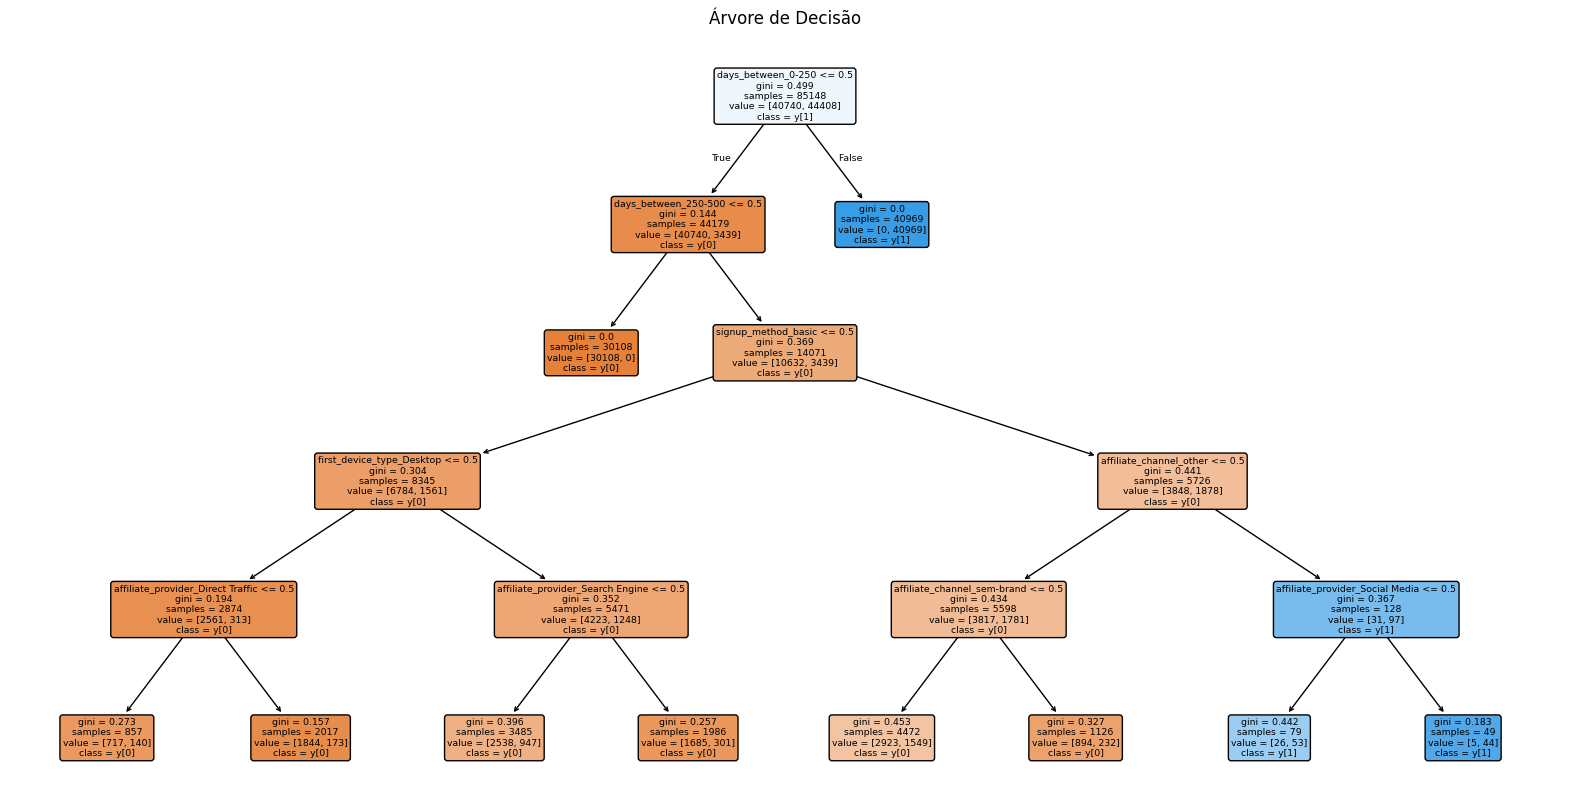

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Decision Tree
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,             # Limita a profundidade máxima da árvore
    min_samples_split=10,    # O número mínimo de amostras necessárias para dividir um nó
    min_samples_leaf=5,      # O número mínimo de amostras em um nó folha
    max_leaf_nodes=20        # Limita o número máximo de nós folha
)

dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Avaliação do modelo Decision Tree
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))  # Ajusta o tamanho do gráfico
plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title("Árvore de Decisão")
plt.show()


KNN


In [75]:

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3)  # Escolha o número de vizinhos
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Avaliação do modelo KNN
print("\nKNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))




KNN Results:
Accuracy: 0.9495490417136415
Confusion Matrix:
 [[ 9845   396]
 [  678 10369]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95     10241
        True       0.96      0.94      0.95     11047

    accuracy                           0.95     21288
   macro avg       0.95      0.95      0.95     21288
weighted avg       0.95      0.95      0.95     21288



Naive Bayes

In [76]:

# 3. Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Avaliação do modelo Naive Bayes
print("\nNaive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.9580045095828635
Confusion Matrix:
 [[10228    13]
 [  881 10166]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     10241
        True       1.00      0.92      0.96     11047

    accuracy                           0.96     21288
   macro avg       0.96      0.96      0.96     21288
weighted avg       0.96      0.96      0.96     21288



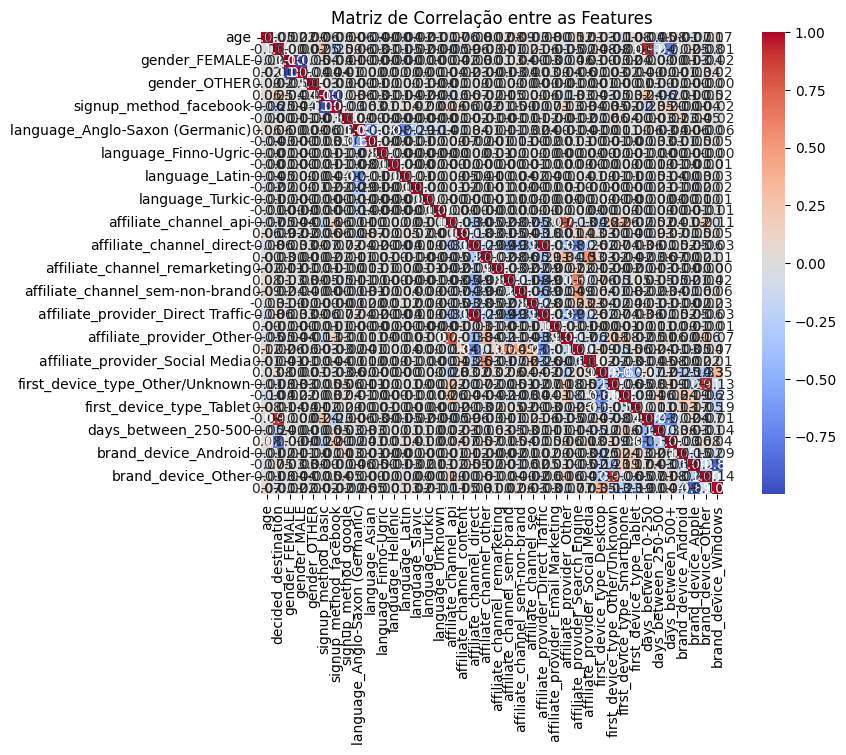

In [77]:
import seaborn as sns

# Calculando a matriz de correlação
correlation_matrix = df_encoded.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre as Features')
plt.show()

### incertezas

Para identificar incertezas no seu contexto problema do airbnb, você pode considerar as seguintes abordagens:

1) Análise de Distribuição das Features:

Verifique a distribuição de cada feature (por exemplo, histograma para idade, contagem para gênero). Isso pode revelar a presença de outliers ou padrões inesperados que podem afetar as previsões.

In [78]:
df_users.columns

Index(['gender', 'age', 'signup_method', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_device_type', 'days_between',
       'decided_destination', 'brand_device'],
      dtype='object')

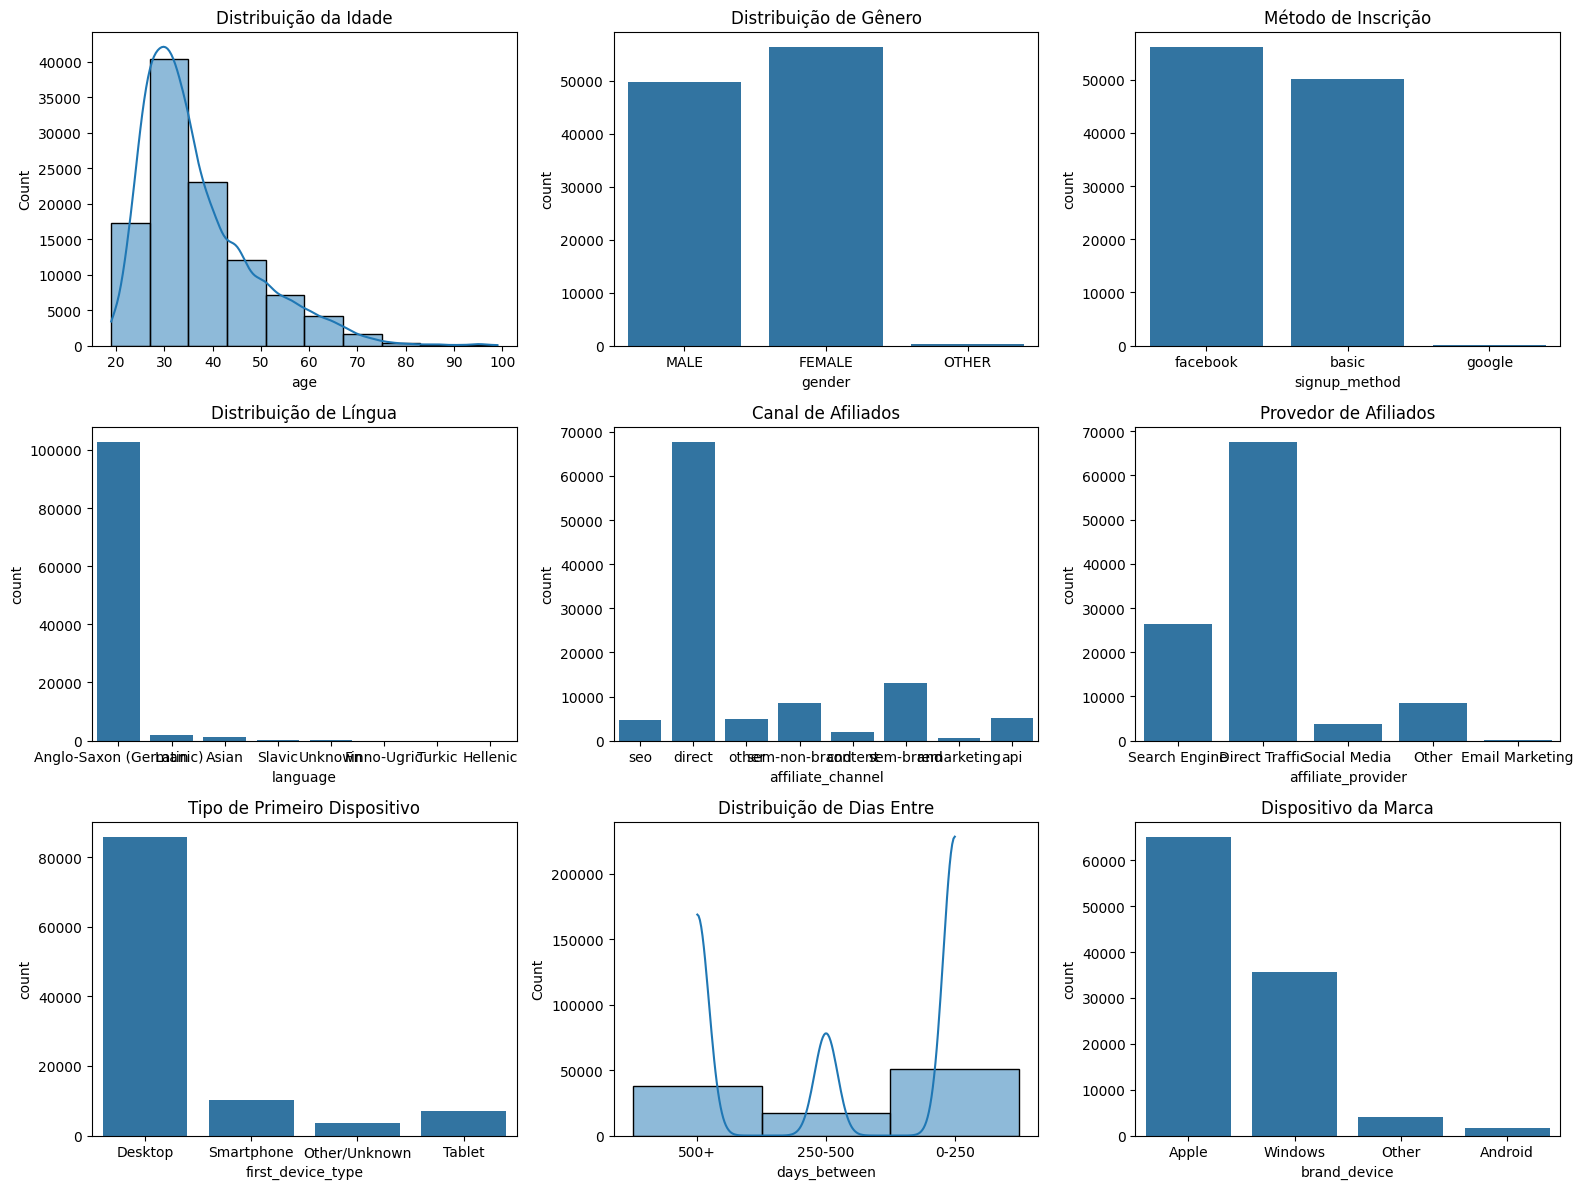

In [79]:

# Função para plotar distribuições
def plot_feature_distributions(df):
    plt.figure(figsize=(16, 12))

    # Distribuição de 'age'
    plt.subplot(3, 3, 1)
    sns.histplot(df['age'], bins=10, kde=True)
    plt.title('Distribuição da Idade')

    # Distribuição de 'gender'
    plt.subplot(3, 3, 2)
    sns.countplot(x='gender', data=df)
    plt.title('Distribuição de Gênero')

    # Distribuição de 'signup_method'
    plt.subplot(3, 3, 3)
    sns.countplot(x='signup_method', data=df)
    plt.title('Método de Inscrição')

    # Distribuição de 'language'
    plt.subplot(3, 3, 4)
    sns.countplot(x='language', data=df)
    plt.title('Distribuição de Língua')

    # Distribuição de 'affiliate_channel'
    plt.subplot(3, 3, 5)
    sns.countplot(x='affiliate_channel', data=df)
    plt.title('Canal de Afiliados')

    # Distribuição de 'affiliate_provider'
    plt.subplot(3, 3, 6)
    sns.countplot(x='affiliate_provider', data=df)
    plt.title('Provedor de Afiliados')

    # Distribuição de 'first_device_type'
    plt.subplot(3, 3, 7)
    sns.countplot(x='first_device_type', data=df)
    plt.title('Tipo de Primeiro Dispositivo')

    # Distribuição de 'days_between'
    plt.subplot(3, 3, 8)
    sns.histplot(df['days_between'], bins=10, kde=True)
    plt.title('Distribuição de Dias Entre')

    # Distribuição de 'brand_device'
    plt.subplot(3, 3, 9)
    sns.countplot(x='brand_device', data=df)
    plt.title('Dispositivo da Marca')

    plt.tight_layout()
    plt.show()

# Chamar a função
plot_feature_distributions(df_users)

A maioria dos usuários está na faixa dos 20 aos 40 anos, com uma cauda longa que atinge idades mais avançadas.

Incerteza: Essa distribuição assimétrica pode indicar uma população concentrada em uma faixa etária específica, o que pode enviesar o modelo. As idades extremas (outliers) fazem sentido estarem em menor quantidade dado a expectativa de vida nacional e o contexto de aluguel de temporada muitas vezes não são o objetivo dos mais idosos(acima de 80 anos).



A maioria dos usuários utiliza o Facebook ou o método básico de inscrição, com menos adesão ao Google.

Incerteza: Esse comportamento pode indicar uma preferência de perfil do usuário por determinados canais, mas também pode levantar questões sobre vieses de canal.

Existe um grupo específico que usa google?

A predominância de uma língua (aparentemente Anglo-Saxônica) é massiva em relação a outras.
Incerteza: A baixa representatividade de outras línguas pode ser um fator limitante na generalização do modelo para usuários de diferentes origens culturais e linguísticas. Isso pode impactar o modelo em casos internacionais.


2) Importância das Features:

Utilize métodos como a importância de características (feature importance) em árvores de decisão ou a análise de SHAP (SHapley Additive exPlanations) para entender como cada feature impacta a previsão e identificar quais têm maior incerteza.

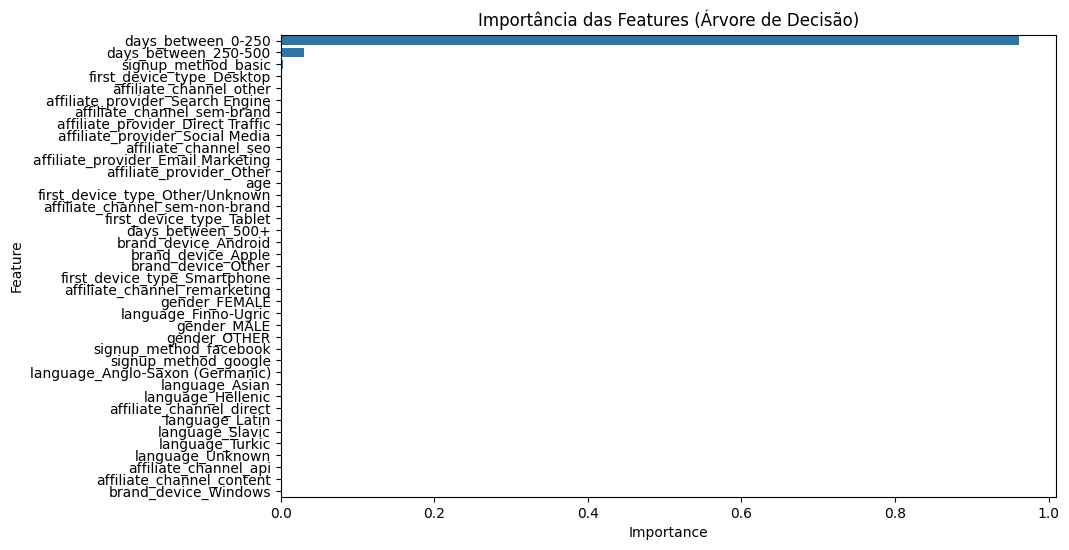

In [80]:

# Extraindo as importâncias das features
feature_importances = dt_classifier.feature_importances_

# Criando um dataframe para visualizar a importância das features
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotando as importâncias das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importância das Features (Árvore de Decisão)')
plt.show()

In [81]:
X_test.columns

Index(['age', 'gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_Anglo-Saxon (Germanic)', 'language_Asian',
       'language_Finno-Ugric', 'language_Hellenic', 'language_Latin',
       'language_Slavic', 'language_Turkic', 'language_Unknown',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider_Search Engine', 'affiliate_provider_Social Media',
       'first_device_type_Desktop', 'first_device_type_Other/Unknown',
       'first_device_type_Smartphone', 'first_device_type_Tablet',
       'days_between_0-250', 'days_between_250-500', 'days_between_50

In [82]:
X_test_new = X_test

In [83]:
import numpy as np
import pandas as pd

# Previsão das probabilidades usando o modelo Decision Tree
knn_probability = knn.predict_proba(X_test)

# Função para calcular a entropia
def calcular_entropia(probabilidades):
    return -np.sum(probabilidades * np.log(probabilidades + 1e-10), axis=1)

# Calcular a entropia e máxima probabilidade
X_test_new['entropias_knn'] = calcular_entropia(knn_probability )
max_probabilidades_knn = np.max(knn_probability , axis=1)

# Criar DataFrame com resultados do modelo Decision Tree
resultados_knn = pd.DataFrame({
    'Instância': range(len(X_test_new['entropias_knn'])),
    'Entropia': X_test_new['entropias_knn'],
    'Max Probabilidade': max_probabilidades_knn
})

print("Resultados do KNN:")
print(resultados_knn)

# Exemplo de incertezas de outros dois modelos (substitua pelos reais)
# Adicionar as incertezas do Decision Tree ao DataFrame


Resultados do KNN:
        Instância      Entropia  Max Probabilidade
145016          0 -1.000000e-10           1.000000
54156           1 -1.000000e-10           1.000000
99082           2 -1.000000e-10           1.000000
193111          3 -1.000000e-10           1.000000
210187          4  6.365142e-01           0.666667
...           ...           ...                ...
53240       21283 -1.000000e-10           1.000000
123970      21284 -1.000000e-10           1.000000
165265      21285  6.365142e-01           0.666667
84760       21286 -1.000000e-10           1.000000
162915      21287  6.365142e-01           0.666667

[21288 rows x 3 columns]


In [84]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,first_device_type_Smartphone,first_device_type_Tablet,days_between_0-250,days_between_250-500,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,entropias_knn
145016,62.0,False,True,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,True,-1.000000e-10
54156,34.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,-1.000000e-10
99082,25.0,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,-1.000000e-10
193111,35.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,-1.000000e-10
210187,35.0,True,False,False,True,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,6.365142e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,False,True,False,False,True,False,True,False,False,-1.000000e-10
123970,28.0,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,-1.000000e-10
165265,28.0,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,6.365142e-01
84760,46.0,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,-1.000000e-10


In [85]:
X_test.columns

Index(['age', 'gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_Anglo-Saxon (Germanic)', 'language_Asian',
       'language_Finno-Ugric', 'language_Hellenic', 'language_Latin',
       'language_Slavic', 'language_Turkic', 'language_Unknown',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider_Search Engine', 'affiliate_provider_Social Media',
       'first_device_type_Desktop', 'first_device_type_Other/Unknown',
       'first_device_type_Smartphone', 'first_device_type_Tablet',
       'days_between_0-250', 'days_between_250-500', 'days_between_50

In [86]:
X_test = X_test.drop(columns =['entropias_knn'])

In [87]:
import numpy as np
import pandas as pd

# Previsão das probabilidades usando o modelo Decision Tree
dt_probability = dt_classifier.predict_proba(X_test)

# Função para calcular a entropia
def calcular_entropia(probabilidades):
    return -np.sum(probabilidades * np.log(probabilidades + 1e-10), axis=1)

# Calcular a entropia e máxima probabilidade
X_test_new['entropias_decision_tree'] = calcular_entropia(dt_probability)
max_probabilidades_decision_tree =np.max(dt_probability , axis=1)


# Criar DataFrame com resultados do modelo Decision Tree
resultados_decision_tree = pd.DataFrame({
    'Instância': range(len(X_test_new['entropias_decision_tree'])),
    'Entropia': X_test_new['entropias_decision_tree'],
    'Max Probabilidade': max_probabilidades_decision_tree
})

print("Resultados do Decision Tree:")
print(resultados_decision_tree)

# Exemplo de incertezas de outros dois modelos (substitua pelos reais)
# Adicionar as incertezas do Decision Tree ao DataFrame


Resultados do Decision Tree:
        Instância      Entropia  Max Probabilidade
145016          0 -1.000000e-10           1.000000
54156           1 -1.000000e-10           1.000000
99082           2 -1.000000e-10           1.000000
193111          3 -1.000000e-10           1.000000
210187          4  6.451753e-01           0.653623
...           ...           ...                ...
53240       21283 -1.000000e-10           1.000000
123970      21284 -1.000000e-10           1.000000
165265      21285  6.451753e-01           0.653623
84760       21286 -1.000000e-10           1.000000
162915      21287  5.849779e-01           0.728264

[21288 rows x 3 columns]


In [88]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,first_device_type_Tablet,days_between_0-250,days_between_250-500,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,entropias_knn,entropias_decision_tree
145016,62.0,False,True,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10
54156,34.0,True,False,False,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10
99082,25.0,False,True,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10
193111,35.0,True,False,False,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10
210187,35.0,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,True,False,False,6.365142e-01,6.451753e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,True,False,False,True,False,True,False,False,-1.000000e-10,-1.000000e-10
123970,28.0,False,True,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10
165265,28.0,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,True,6.365142e-01,6.451753e-01
84760,46.0,False,True,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10


In [89]:
import numpy as np
import pandas as pd

# Previsão das probabilidades usando o modelo Decision Tree
naive_probability = nb_classifier.predict_proba(X_test)

# Função para calcular a entropia
def calcular_entropia(probabilidades):
    return -np.sum(probabilidades * np.log(probabilidades + 1e-10), axis=1)

# Calcular a entropia e máxima probabilidade
X_test_new['entropias_naive'] = calcular_entropia(naive_probability)
max_probabilidades_naive= np.max(naive_probability , axis=1)

# Criar DataFrame com resultados do modelo Decision Tree
resultados_naive = pd.DataFrame({
    'Instância': range(len(X_test_new['entropias_naive'] )),
    'Entropia': X_test_new['entropias_naive'] ,
    'Max Probabilidade': max_probabilidades_naive
})

print("Resultados do naive:")
print(resultados_naive)

# Exemplo de incertezas de outros dois modelos (substitua pelos reais)
# Adicionar as incertezas do Decision Tree ao DataFrame


Resultados do naive:
        Instância      Entropia  Max Probabilidade
145016          0 -1.000000e-10           1.000000
54156           1 -1.000000e-10           1.000000
99082           2 -1.000000e-10           1.000000
193111          3 -1.000000e-10           1.000000
210187          4  1.581942e-01           0.963029
...           ...           ...                ...
53240       21283 -1.000000e-10           1.000000
123970      21284 -1.000000e-10           1.000000
165265      21285  5.066803e-01           0.795425
84760       21286 -1.000000e-10           1.000000
162915      21287  2.353217e-04           0.999980

[21288 rows x 3 columns]


In [90]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,days_between_0-250,days_between_250-500,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,entropias_knn,entropias_decision_tree,entropias_naive
145016,62.0,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
54156,34.0,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
99082,25.0,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
193111,35.0,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
210187,35.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,6.365142e-01,6.451753e-01,1.581942e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
123970,28.0,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
165265,28.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,6.365142e-01,6.451753e-01,5.066803e-01
84760,46.0,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10


Aplique cada modelo na base de teste e calcule a incerteza de cada um por instância, usando por exemplo, a entropia das probabilidades de classe ou a máxima probabilidade estimada pelo modelo.

In [91]:
X_test_new = X_test_new.rename(columns ={'entropias_knn':'incerteza_knn', 'entropias_decision_tree': 'incerteza_decision_tree', 'entropias_naive': 'incerteza_naive'})

In [92]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,days_between_0-250,days_between_250-500,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,incerteza_knn,incerteza_decision_tree,incerteza_naive
145016,62.0,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
54156,34.0,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
99082,25.0,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
193111,35.0,True,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
210187,35.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,6.365142e-01,6.451753e-01,1.581942e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10
123970,28.0,False,True,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10
165265,28.0,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,6.365142e-01,6.451753e-01,5.066803e-01
84760,46.0,False,True,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10


 Estime a incerteza aleatórica de cada instância usando a média da incerteza entre os modelos.

In [93]:
X_test_new['incerteza aleatórica'] = X_test_new[['incerteza_knn', 'incerteza_decision_tree', 'incerteza_naive']].mean(axis=1)

Estime a incerteza epistêmica do pool usando a variância da incerteza entre os modelos.

In [94]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,days_between_250-500,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,incerteza_knn,incerteza_decision_tree,incerteza_naive,incerteza aleatórica
145016,62.0,False,True,False,False,True,False,True,False,False,...,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
54156,34.0,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
99082,25.0,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
193111,35.0,True,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
210187,35.0,True,False,False,True,False,False,True,False,False,...,True,False,False,True,False,False,6.365142e-01,6.451753e-01,1.581942e-01,4.799612e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,False,True,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
123970,28.0,False,True,False,True,False,False,True,False,False,...,False,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10
165265,28.0,True,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,6.365142e-01,6.451753e-01,5.066803e-01,5.961232e-01
84760,46.0,False,True,False,True,False,False,True,False,False,...,False,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10


Estime a incerteza epistêmica do pool usando a variância da incerteza entre os modelos.

In [95]:
# Calcular a variância das incertezas em relação à média
X_test_new['incerteza_epistemica'] = X_test_new[['incerteza_knn', 'incerteza_decision_tree', 'incerteza_naive']].var(axis=1)


In [96]:
X_test_new

,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,incerteza_knn,incerteza_decision_tree,incerteza_naive,incerteza aleatórica,incerteza_epistemica
145016,62.0,False,True,False,False,True,False,True,False,False,...,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
54156,34.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
99082,25.0,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
193111,35.0,True,False,False,False,True,False,True,False,False,...,False,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
210187,35.0,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,6.365142e-01,6.451753e-01,1.581942e-01,4.799612e-01,0.077669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53240,60.0,True,False,False,False,True,False,True,False,False,...,True,False,True,False,False,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
123970,28.0,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000
165265,28.0,True,False,False,True,False,False,True,False,False,...,False,False,False,False,True,6.365142e-01,6.451753e-01,5.066803e-01,5.961232e-01,0.006019
84760,46.0,False,True,False,True,False,False,True,False,False,...,True,False,False,False,True,-1.000000e-10,-1.000000e-10,-1.000000e-10,-1.000000e-10,0.000000


4. Faça uma análise exploratória tentando relacionar as caraterísticas do problema com as incertezas estimadas. Tente responder a pergunta: em que situações (para que características) a incerteza das instâncias é alta? Vc pode por exemplo:

In [97]:
X_test_new.columns

Index(['age', 'gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_Anglo-Saxon (Germanic)', 'language_Asian',
       'language_Finno-Ugric', 'language_Hellenic', 'language_Latin',
       'language_Slavic', 'language_Turkic', 'language_Unknown',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider_Search Engine', 'affiliate_provider_Social Media',
       'first_device_type_Desktop', 'first_device_type_Other/Unknown',
       'first_device_type_Smartphone', 'first_device_type_Tablet',
       'days_between_0-250', 'days_between_250-500', 'days_between_50

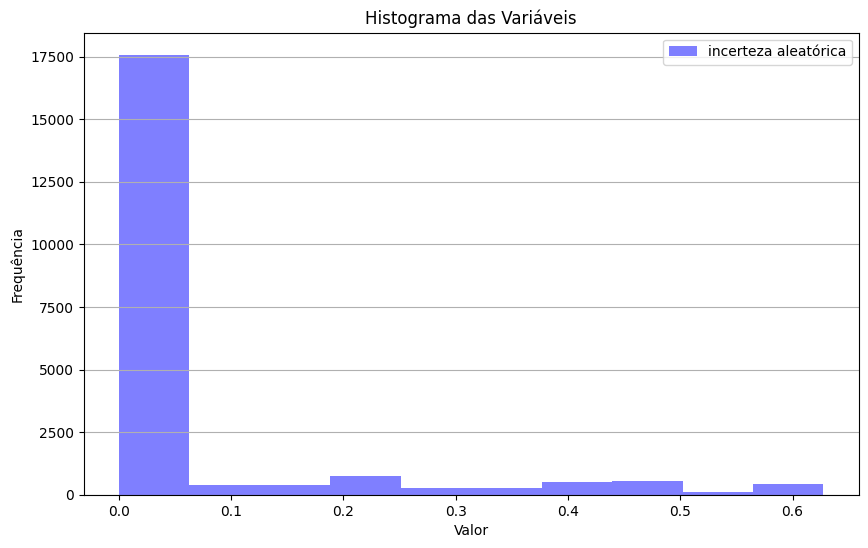

In [98]:
plt.figure(figsize=(10, 6))

# Histograma da segunda variável
plt.hist(X_test_new['incerteza aleatórica'], bins=10, alpha=0.5, label='incerteza aleatórica', color='blue')

# Configurações do gráfico
plt.title('Histograma das Variáveis')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

In [99]:
X_test_new.columns

Index(['age', 'gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_Anglo-Saxon (Germanic)', 'language_Asian',
       'language_Finno-Ugric', 'language_Hellenic', 'language_Latin',
       'language_Slavic', 'language_Turkic', 'language_Unknown',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider_Search Engine', 'affiliate_provider_Social Media',
       'first_device_type_Desktop', 'first_device_type_Other/Unknown',
       'first_device_type_Smartphone', 'first_device_type_Tablet',
       'days_between_0-250', 'days_between_250-500', 'days_between_50

Idioma

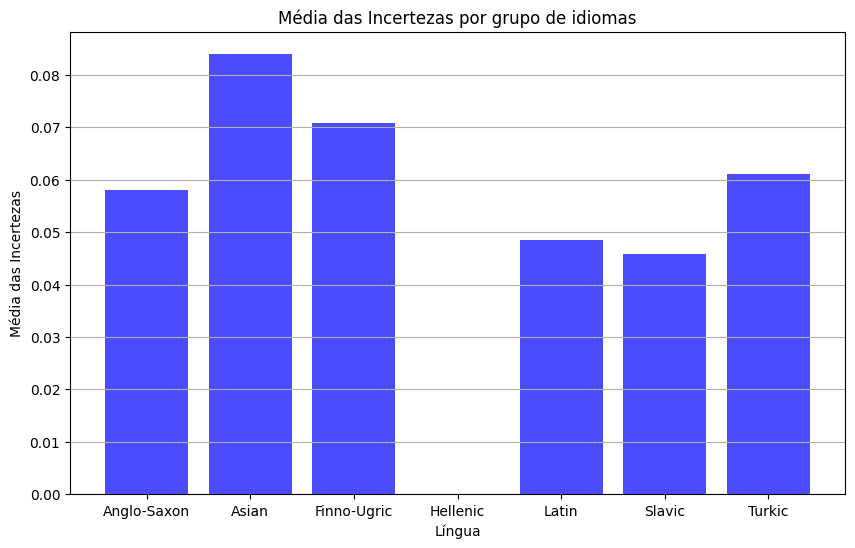

In [102]:
medias_incerteza = {
    'Anglo-Saxon': X_test_new[X_test_new['language_Anglo-Saxon (Germanic)']==True]['incerteza aleatórica'].mean(),
    'Asian': X_test_new[X_test_new['language_Asian']==True]['incerteza aleatórica'].mean(),
    'Finno-Ugric': X_test_new[X_test_new['language_Finno-Ugric']==True]['incerteza aleatórica'].mean(),
    'Hellenic': X_test_new[X_test_new['language_Hellenic']==True]['incerteza aleatórica'].mean(),
    'Latin': X_test_new[X_test_new['language_Latin']==True]['incerteza aleatórica'].mean(),
     'Slavic': X_test_new[X_test_new['language_Slavic']==True]['incerteza aleatórica'].mean(),
     'Turkic': X_test_new[X_test_new['language_Turkic']==True]['incerteza aleatórica'].mean(),
}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['Língua', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['Língua'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por grupo de idiomas')
plt.xlabel('Língua')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

Age

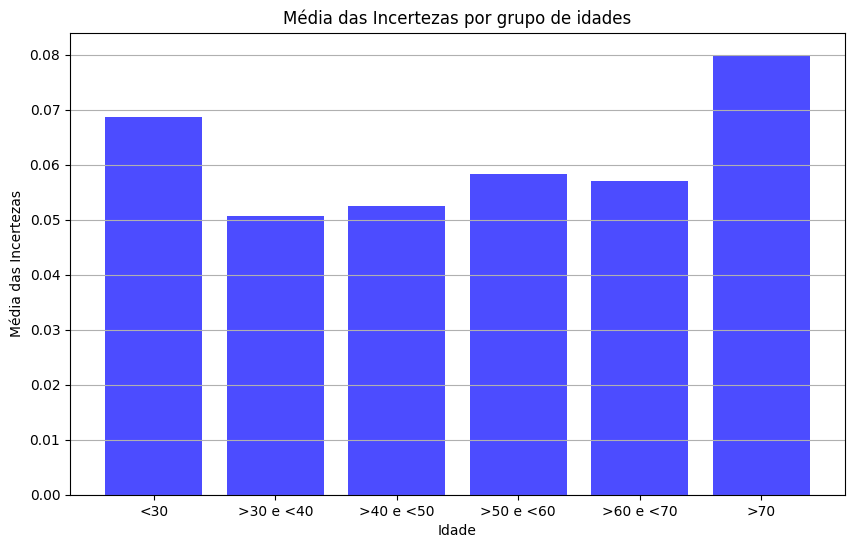

In [103]:
medias_incerteza = {
    '<30': X_test_new[X_test_new['age']<30]['incerteza aleatórica'].mean(),
    '>30 e <40': X_test_new[(X_test_new['age']>30)&(X_test_new['age']<40)]['incerteza aleatórica'].mean(),
    '>40 e <50': X_test_new[(X_test_new['age']>40)&(X_test_new['age']<50)]['incerteza aleatórica'].mean(),
    '>50 e <60': X_test_new[(X_test_new['age']>50)&(X_test_new['age']<60)]['incerteza aleatórica'].mean(),
    '>60 e <70': X_test_new[(X_test_new['age']>60)&(X_test_new['age']<70)]['incerteza aleatórica'].mean(),
     '>70': X_test_new[X_test_new['age']>70]['incerteza aleatórica'].mean(),
}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['Idade', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['Idade'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por grupo de idades')
plt.xlabel('Idade')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

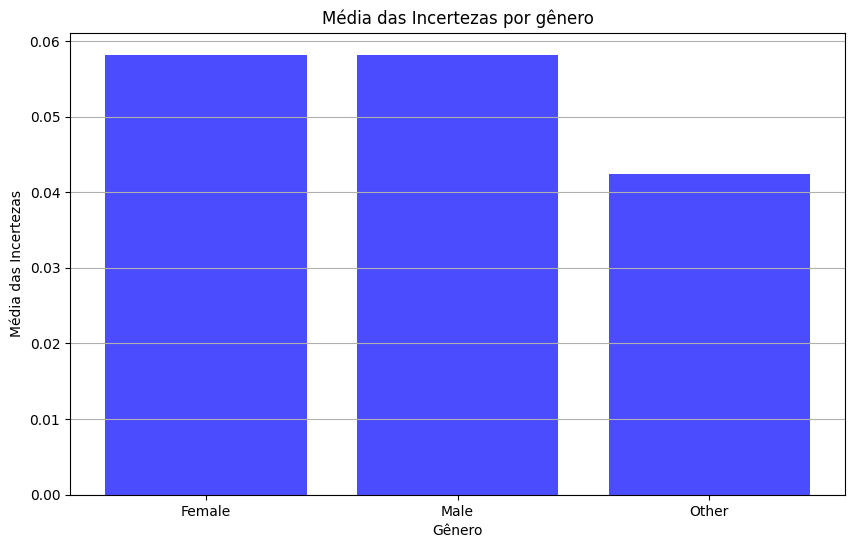

In [105]:
medias_incerteza = {
    'Female': X_test_new[X_test_new['gender_FEMALE']==True]['incerteza aleatórica'].mean(),
     'Male': X_test_new[X_test_new['gender_FEMALE']==True]['incerteza aleatórica'].mean(),
     'Other': X_test_new[X_test_new['gender_OTHER']==True]['incerteza aleatórica'].mean(),
}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['Gender', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['Gender'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

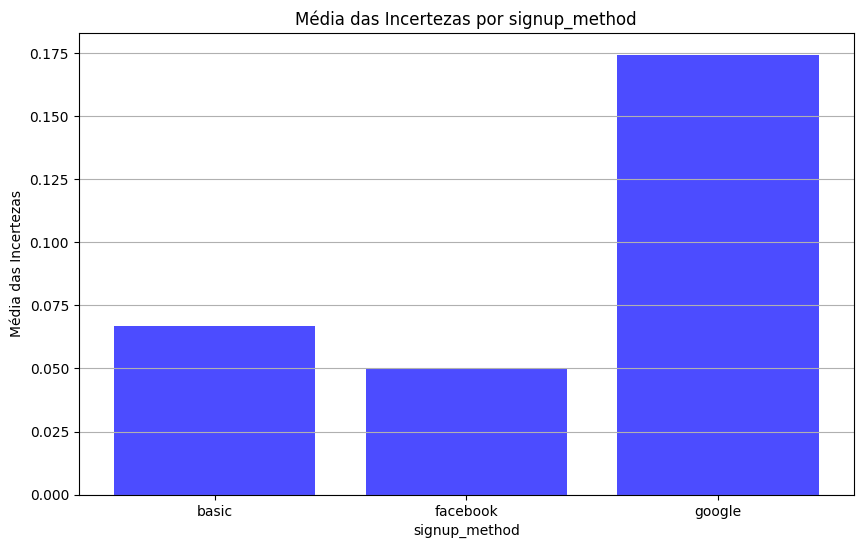

In [106]:
medias_incerteza = {
    'basic': X_test_new[X_test_new['signup_method_basic']==True]['incerteza aleatórica'].mean(),
     'facebook': X_test_new[X_test_new['signup_method_facebook']==True]['incerteza aleatórica'].mean(),
     'google': X_test_new[X_test_new['signup_method_google']==True]['incerteza aleatórica'].mean(),
}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['signup_method', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['signup_method'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por signup_method')
plt.xlabel('signup_method')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

Google possui uma incerteza muito maior do que os outros tipos de signup. Isso pode ser o caso da quantidade de valores na categoria signup method ter sido desproporcional

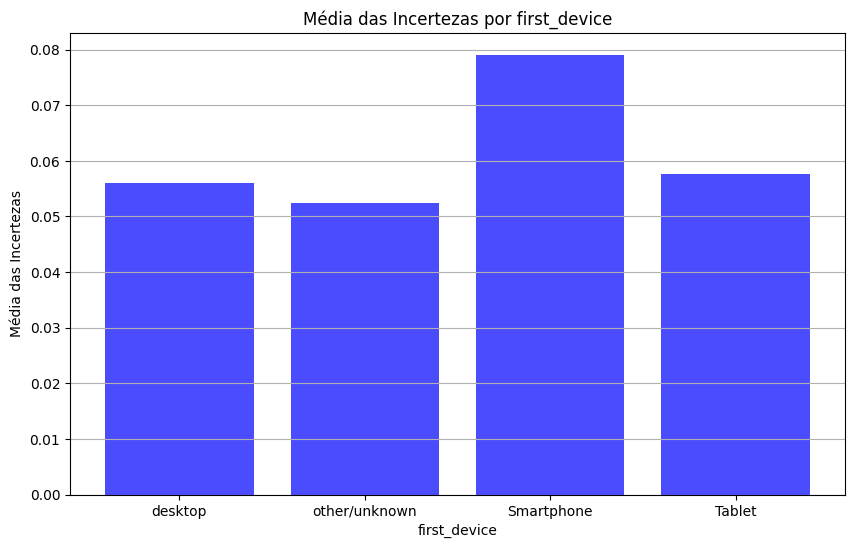

In [108]:
medias_incerteza = {
    'desktop': X_test_new[X_test_new['first_device_type_Desktop']==True]['incerteza aleatórica'].mean(),
     'other/unknown': X_test_new[X_test_new['first_device_type_Other/Unknown']==True]['incerteza aleatórica'].mean(),
     'Smartphone': X_test_new[X_test_new['first_device_type_Smartphone']==True]['incerteza aleatórica'].mean(),
      'Tablet': X_test_new[X_test_new['first_device_type_Tablet']==True]['incerteza aleatórica'].mean(),

}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['first_device', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['first_device'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por first_device')
plt.xlabel('first_device')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

Se esperaria que a incerteza média seria maior para aparelhos desconhecidos do que telefones
Vale uma investigação mais a fundo

In [113]:
print(len(X_test_new[X_test_new['days_between_0-250']==True]))
print(len(X_test_new[X_test_new['days_between_250-500']==True]))
print(len(X_test_new[X_test_new['days_between_500+']==True]))

10161
3430
7697


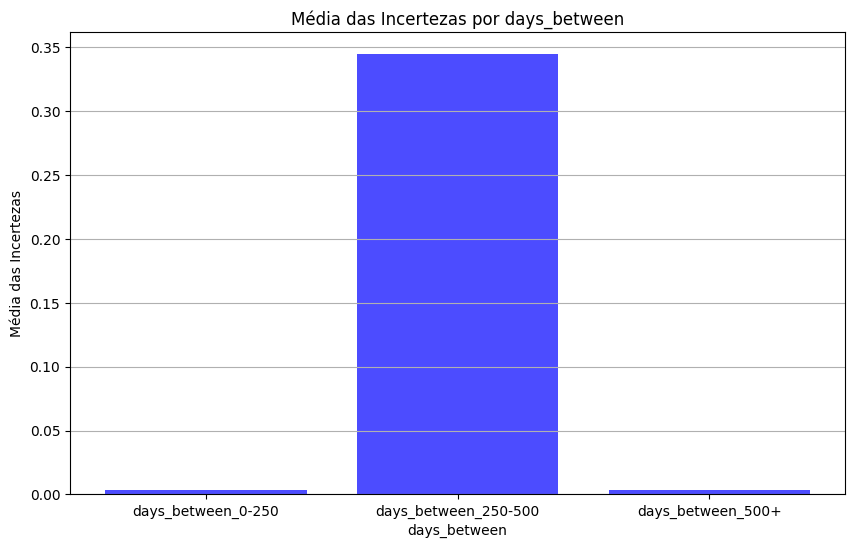

In [110]:
medias_incerteza = {
    'days_between_0-250': X_test_new[X_test_new['days_between_0-250']==True]['incerteza aleatórica'].mean(),
     'days_between_250-500': X_test_new[X_test_new['days_between_250-500']==True]['incerteza aleatórica'].mean(),
      'days_between_500+': X_test_new[X_test_new['days_between_500+']==True]['incerteza aleatórica'].mean(),

}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['days_between', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['days_between'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por days_between')
plt.xlabel('days_between')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

A incerteza é muito alta entre 250 dias e 500 dias, isso pode ser devido o desbalanceamento entre days_between_0-250(10161), days_between_250-500(3430) e days_between_500+(7697)




In [115]:
print(len(X_test_new[X_test_new['brand_device_Android']==True]))
print(len(X_test_new[X_test_new['brand_device_Apple']==True]))
print(len(X_test_new[X_test_new['brand_device_Other']==True]))
print(len(X_test_new[X_test_new['brand_device_Windows']==True]))

330
13042
795
7121


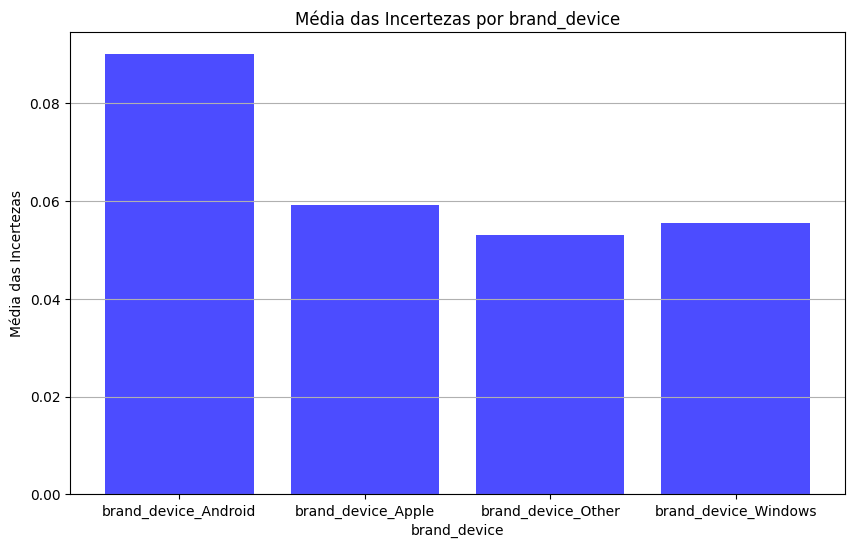

In [114]:
medias_incerteza = {
    'brand_device_Android': X_test_new[X_test_new['brand_device_Android']==True]['incerteza aleatórica'].mean(),
    'brand_device_Apple': X_test_new[X_test_new['brand_device_Apple']==True]['incerteza aleatórica'].mean(),
    'brand_device_Other': X_test_new[X_test_new['brand_device_Other']==True]['incerteza aleatórica'].mean(),
    'brand_device_Windows': X_test_new[X_test_new['brand_device_Windows']==True]['incerteza aleatórica'].mean(),

}


# Converter o dicionário em um DataFrame para facilitar a plotagem
medias_df = pd.DataFrame(list(medias_incerteza.items()), columns=['brand_device', 'Incerteza Aleatória'])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_df['brand_device'], medias_df['Incerteza Aleatória'], color='blue', alpha=0.7)

# Configurações do gráfico
plt.title('Média das Incertezas por brand_device')
plt.xlabel('brand_device')
plt.ylabel('Média das Incertezas')
plt.grid(axis='y')

# Exibir o gráfico
plt.show()

A alta incerteza de aparelhos android pode ser explicado dado a disparidade da quantidade entre as opções existentes

In [116]:
X_test_new.columns

Index(['age', 'gender_FEMALE', 'gender_MALE', 'gender_OTHER',
       'signup_method_basic', 'signup_method_facebook', 'signup_method_google',
       'language_Anglo-Saxon (Germanic)', 'language_Asian',
       'language_Finno-Ugric', 'language_Hellenic', 'language_Latin',
       'language_Slavic', 'language_Turkic', 'language_Unknown',
       'affiliate_channel_api', 'affiliate_channel_content',
       'affiliate_channel_direct', 'affiliate_channel_other',
       'affiliate_channel_remarketing', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_channel_seo',
       'affiliate_provider_Direct Traffic',
       'affiliate_provider_Email Marketing', 'affiliate_provider_Other',
       'affiliate_provider_Search Engine', 'affiliate_provider_Social Media',
       'first_device_type_Desktop', 'first_device_type_Other/Unknown',
       'first_device_type_Smartphone', 'first_device_type_Tablet',
       'days_between_0-250', 'days_between_250-500', 'days_between_50

In [ ]:

# Define a largura máxima das colunas para evitar truncamento
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.expand_frame_repr', False)  # Não quebra a linha ao imprimir


In [119]:
X_test_new[X_test_new['incerteza aleatórica'] == X_test_new['incerteza aleatórica'].max()]


,age,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Anglo-Saxon (Germanic),language_Asian,language_Finno-Ugric,...,days_between_500+,brand_device_Android,brand_device_Apple,brand_device_Other,brand_device_Windows,incerteza_knn,incerteza_decision_tree,incerteza_naive,incerteza aleatórica,incerteza_epistemica
153364,31.0,True,False,False,True,False,False,True,False,False,...,False,False,True,False,False,0.636514,0.645175,0.600872,0.62752,0.000551


Observando o indice com maior incerteza:
é uma mulher de 31 anos que entrou pelo login do próprio airbnb (signup basic) que fala uma lingua anglo-saxonica/germânica usando um aparelho Apple

Os dados individualmente não deveriam dar uma incerteza aleatórica tão alta